In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from copy import deepcopy
from collections import Counter
import json
from tqdm import tqdm
import glob
import light_curve as lc
import ast
from tqdm import tqdm 

In [2]:
data_lc = pd.read_csv('/media3/darc/crp8_variability/notebooks/FINAL_Galactic_all.csv')

In [8]:
#data_lc

In [4]:
data_lc["ztf_id"].value_counts()[lambda x: x > 1]

ztf_id
ZTF20ablhqiw    2
Name: count, dtype: int64

In [5]:
data_lc[data_lc["ztf_id"]=='ZTF20ablhqiw']

,ztf_id,ra_mean_dr,dec_mean_dr,mjd,mag,magerr,band,catflags,source,ID_gaia,...,class_gaia,classSc_gaia,ra_gaia,dec_gaia,GroupID,GroupSize,Separation,top_class,cat_id,finkclass
30575,ZTF20ablhqiw,246.71402,-23.518179,"[58235.3757176, 58235.4380208, 58246.3560764, ...","[16.9598713, 17.0112038, 16.9211617, 16.920650...","[0.0300003178, 0.0302790608, 0.0298037305, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[32, 32, 32, 32, 0, 32, 32, 32, 32, 0, 32768, ...",6.050899e+18,3.753167e+17,...,YSO,0.965314,246.714097,-23.518190,2996.0,2.0,0.257167,['Unknown'],"['Hunt_ReffertOCmembers_291914', 'Hunt_Reffert...","['Unknown', 'Unknown', 'Unknown', 'Unknown']"
30576,ZTF20ablhqiw,246.71402,-23.518179,"[58235.3757176, 58235.4380208, 58246.3560764, ...","[16.9598713, 17.0112038, 16.9211617, 16.920650...","[0.0300003178, 0.0302790608, 0.0298037305, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[32, 32, 32, 32, 0, 32, 32, 32, 32, 0, 32768, ...",6.050899e+18,3.753167e+17,...,YSO,0.930961,246.713715,-23.518007,2996.0,2.0,1.181112,['Unknown'],"['Hunt_ReffertOCmembers_291914', 'Hunt_Reffert...","['Unknown', 'Unknown', 'Unknown', 'Unknown']"


In [11]:
data_lc = data_lc.drop_duplicates(subset="ztf_id", keep="first")

In [12]:
data_lc

,ztf_id,ra_mean_dr,dec_mean_dr,mjd,mag,magerr,band,catflags,source,ID_gaia,...,class_gaia,classSc_gaia,ra_gaia,dec_gaia,GroupID,GroupSize,Separation,top_class,cat_id,finkclass
0,ZTF19aaxifvw,295.324234,40.326094,"[58204.5143519, 58207.5097685, 58207.5227662, ...","[16.7076283, 16.6761169, 16.7013016, 16.685249...","[0.0144392345, 0.0143157234, 0.0144141503, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[32768, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",NaN,NaN,...,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,['Star'],"['HuntOCs_2_744836', 'HuntOCs_2_744836', 'Hunt...","['Star', 'Star', 'Star', 'Star', 'Star', 'Star']"
1,ZTF19aadosog,264.425380,-3.260064,"[58204.5047222, 58204.5313542, 58207.4700579, ...","[15.3615971, 15.3990307, 15.397109, 15.390646,...","[0.0269933715, 0.0268484559, 0.0268558413, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 0, 0, 0, 0, 32768, 0, 0, 0, 0, 0, 0, 0,...",4.368929e+18,3.753167e+17,...,LPV,0.610911,264.425361,-3.260082,1.0,3.0,0.093589,['LPV*' 'RRLyr' 'Unknown'],"['HuntOCs_2_661028', 'HuntOCs_2_661028', 'Hunt...","['LPV*', 'LPV*', 'LPV*', 'LPV*', 'LPV*', 'LPV*..."
2,ZTF18actrkpz,112.869984,0.854739,"[58204.1836111, 58204.1975926, 58207.2177431, ...","[13.987051, 14.0066805, 13.9918499, 14.0148687...","[0.0106569408, 0.0106596276, 0.0106575815, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 0, 0, 32768, 0, 32768, 0, 0, 0, 0, 3276...",NaN,NaN,...,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,['Unknown'],"['Hunt_ReffertOCmembers_973163', 'Hunt_Reffert...","['Unknown', 'Unknown', 'Unknown', 'Unknown']"
3,ZTF19abrkryh,288.278997,-22.143266,"[58229.5008218, 58232.5003588, 58258.4809722, ...","[17.0531788, 17.0086212, 17.0192261, 17.020351...","[0.0203975122, 0.0200282242, 0.0201147124, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[32768, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",NaN,NaN,...,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,['Star' 'Unknown'],"['Hunt_ReffertOCmembers_1271691', 'Hunt_Reffer...","['Unknown', 'Star', 'Unknown', 'Star', 'Star',..."
4,ZTF22aapkjuq,48.384165,61.270517,"[58206.1445718, 58298.468125, 58303.4488426, 5...","[17.2257824, 17.1839542, 17.2256432, 17.185871...","[0.0266686473, 0.0263112336, 0.0266674254, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[32768, 0, 32768, 32768, 32768, 32768, 0, 0, 0...",4.635905e+17,3.753167e+17,...,SOLAR_LIKE,0.531407,48.384180,61.270505,NaN,NaN,0.048173,['Star'],"['Hunt_ReffertOCmembers_950474', 'Hunt_Reffert...","['Star', 'Star', 'Star', 'Star', 'Star', 'Star..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40850,ZTF18abmmwds,322.235445,66.474263,"[58206.4420833, 58206.472037, 58209.4573148, 5...","[18.2208443, 18.0681763, 17.6635284, 17.627731...","[0.0321904682, 0.0299819037, 0.025351949, 0.02...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[32768, 32768, 0, 0, 32768, 0, 0, 32768, 32768...",2.221178e+18,3.753167e+17,...,YSO,0.717603,322.235440,66.474260,1952.0,2.0,0.010732,['Candidate_LP*' 'Unknown'],"['Hunt_ReffertOCmembers_219129', 'Hunt_Reffert...","['Candidate_LP*', 'Candidate_LP*', 'Candidate_..."
40851,ZTF19acabkwk,254.301940,-4.084825,"[58203.5008102, 58206.4605671, 58206.4886806, ...","[13.5890265, 13.6498413, 13.6958265, 13.575630...","[0.0183401555, 0.018281037, 0.0182370152, 0.01...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 0, 32768, 0, 0, 0, 0, 32768, 0, 0, 0, 0...",NaN,NaN,...,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,['Star'],"['Hunt_ReffertOCmembers_701865', 'Hunt_Reffert...","['Star', 'Star', 'Star', 'Star']"
40852,ZTF22ablxsvb,21.248236,70.617090,"[58269.4718981, 58273.4698958, 58279.4664699, ...","[15.4977226, 15.5062399, 15.4915037, 15.520465...","[0.0149599891, 0.0149686178, 0.0149537576, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 0, 0, 0, 0, 0, 0, 32768, 0, 0, 32768, 0...",5.325425e+17,3.753167e+17,...,SOLAR_LIKE,0.276833,21.248250,70.617072,NaN,NaN,0.066977,['Star' 'Unknown'],"['Hun

# Preprocessing the data

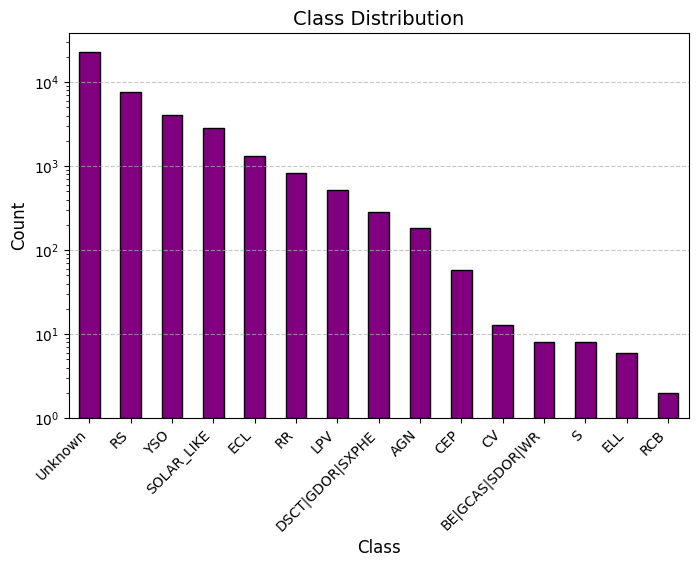

In [9]:
counts = data_lc['class_gaia'].value_counts()
counts
# Plot
plt.figure(figsize=(8,5))
counts.plot(kind="bar", color="purple", edgecolor="black", log=True)

plt.title("Class Distribution", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [10]:
counts

class_gaia
Unknown            23102
RS                  7669
YSO                 4070
SOLAR_LIKE          2802
ECL                 1313
RR                   826
LPV                  521
DSCT|GDOR|SXPHE      281
AGN                  182
CEP                   57
CV                    12
BE|GCAS|SDOR|WR        7
S                      7
ELL                    5
RCB                    1
Name: count, dtype: int64

In [20]:
data_lc[data_lc['class_gaia']=='Unknown']['top_class'].value_counts()

top_class
['Unknown']                                      10413
['Star' 'Unknown']                                3154
['Star']                                          2835
['Candidate_YSO' 'YSO_Candidate']                  359
['Candidate_YSO' 'Unknown' 'YSO_Candidate']        322
                                                 ...  
['EB*' 'RSCVnV*' 'Unknown']                          1
['GinCl' 'Radio' 'Star' 'Unknown']                   1
['EllipVar' 'Star' 'Unknown' 'YSO']                  1
['LP*_Candidate' 'Radio' 'Star' 'Unknown']           1
['Em*' 'LPV*' 'LongPeriodV*' 'Unknown' 'YSO']        1
Name: count, Length: 943, dtype: int64

# Separating the Dataset into different catalogs (Tracing back):

In [22]:
data_lc['cat_id'].loc[0]

"['HuntOCs_2_744836', 'HuntOCs_2_744836', 'HuntOCs_2_744836', 'Hunt_ReffertOCmembers_844836', 'Hunt_ReffertOCmembers_844836', 'Hunt_ReffertOCmembers_844836']"

In [29]:
np.unique(ast.literal_eval(data_lc['cat_id'].loc[0]))[1].split('_')[]

['Hunt', 'ReffertOCmembers']

In [36]:
np.unique(ast.literal_eval(data_lc['cat_id'].loc[15000]))

array(['HuntOCs_1_48118', 'Hunt_ReffertOCmembers_48118'], dtype='<U27')

In [40]:
import ast
import re

def clean_cat_ids(cat_id_str):
    try:
        ids = ast.literal_eval(cat_id_str)  # convert string -> list
    except Exception:
        return []

    cleaned = []
    for cid in ids:
        # Remove trailing digits after underscore(s)
        base = re.sub(r'_\d+$', '', cid)
        cleaned.append(base)

    # Ensure uniqueness
    return list(np.unique(cleaned))

# Apply to dataframe
data_lc["cat_id_cleaned"] = data_lc["cat_id"].apply(clean_cat_ids)

# Check result
#print(data_lc[["cat_id", "cat_id_cleaned"]].head())

                                              cat_id  \
0  ['HuntOCs_2_744836', 'HuntOCs_2_744836', 'Hunt...   
1  ['HuntOCs_2_661028', 'HuntOCs_2_661028', 'Hunt...   
2  ['Hunt_ReffertOCmembers_973163', 'Hunt_Reffert...   
3  ['Hunt_ReffertOCmembers_1271691', 'Hunt_Reffer...   
4  ['Hunt_ReffertOCmembers_950474', 'Hunt_Reffert...   

                       cat_id_cleaned  
0  [HuntOCs_2, Hunt_ReffertOCmembers]  
1  [HuntOCs_2, Hunt_ReffertOCmembers]  
2  [HuntOCs_2, Hunt_ReffertOCmembers]  
3  [HuntOCs_2, Hunt_ReffertOCmembers]  
4  [HuntOCs_2, Hunt_ReffertOCmembers]  


/tmp/ipykernel_968287/3500458586.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lc["cat_id_cleaned"] = data_lc["cat_id"].apply(clean_cat_ids)


In [42]:
data_lc['cat_id_cleaned'].value_counts()

cat_id_cleaned
[HuntOCs_2, Hunt_ReffertOCmembers]               30476
[HuntOCs_1, Hunt_ReffertOCmembers]                6294
[HuntOCs_2]                                       2218
[Hunt_ReffertOCmembers]                           1647
[HuntOCs_1]                                         58
[NGC_104_47Tuc]                                     53
[HuntOCs_1, HuntOCs_2, Hunt_ReffertOCmembers]       17
[NGC_5139_oCen]                                     10
[NGC_2808]                                           9
[NGC_6752]                                           8
[NGC_4372]                                           8
[NGC_4833]                                           5
[NGC_362]                                            5
[NGC_6121_M_4]                                       4
[NGC_6397]                                           4
[BH_140]                                             4
[BH_140, NGC_6362]                                   3
[NGC_6362]                                        

In [47]:
subset = data_lc[data_lc["cat_id_cleaned"].apply(lambda x: x == ["HuntOCs_1"])]

subset.head()

,ztf_id,ra_mean_dr,dec_mean_dr,mjd,mag,magerr,band,catflags,source,ID_gaia,...,dec_gaia,GroupID,GroupSize,Separation,top_class,cat_id,finkclass,final_class,canonical_class,cat_id_cleaned
388,ZTF18acruydb,55.911897,60.676609,"[58204.1452199, 58204.1695139, 58312.4824653, ...","[14.9649305, 14.9661436, 14.9056368, 14.931503...","[0.017562272, 0.0175638124, 0.0174882673, 0.01...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[32768, 32768, 0, 0, 0, 0, 0, 32768, 0, 0, 0, ...",4.743512e+17,3.753167e+17,...,60.676602,67.0,2.0,0.029706,['Unknown'],"['HuntOCs_1_95686', 'HuntOCs_1_95686', 'HuntOC...","['Unknown', 'Unknown', 'Unknown', 'Unknown', '...",n,Unknown,[HuntOCs_1]
763,ZTF18abdjzfu,345.615012,58.117424,"[58228.4886111, 58235.5034375, 58244.4519097, ...","[14.438715, 14.3635187, 14.401228, 14.3598747,...","[0.0111802267, 0.0111214938, 0.0111506041, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 0, 32768, 0, 0, 0, 0, 0, 32768, 0, 0, 0...",NaN,NaN,...,NaN,NaN,NaN,NaN,['Unknown'],"['HuntOCs_1_97158', 'HuntOCs_1_97158', 'HuntOC...","['Unknown', 'Unknown', 'Unknown', 'Unknown']",n,Unknown,[HuntOCs_1]
1450,ZTF17aaaqumd,87.460555,27.117059,"[58204.129375, 58204.1565509, 58205.128287, 58...","[17.553112, 17.5182838, 17.2287292, 17.289629,...","[0.0271249674, 0.0266847815, 0.023462316, 0.02...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[32768, 32768, 32768, 32768, 0, 0, 0, 32768, 0...",NaN,NaN,...,NaN,NaN,NaN,NaN,['Em*' 'LPV*' 'LongPeriodV*' 'Star' 'Unknown'],"['HuntOCs_1_95062', 'HuntOCs_1_95062', 'HuntOC...","['Em*', 'Em*', 'Unknown', 'Unknown', 'Em*', 'U...",',Unknown,[HuntOCs_1]
1816,ZTF21aajxxhf,276.885079,-13.394458,"[58208.4659144, 58208.4861458, 58209.5116088, ...","[16.089817, 15.8590517, 15.8751488, 15.871603,...","[0.0168680307, 0.0161815658, 0.0162246525, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[32768, 32768, 0, 0, 32800, 32, 32, 32, 0, 32,...",NaN,NaN,...,NaN,NaN,NaN,NaN,['Unknown'],"['HuntOCs_1_98429', 'HuntOCs_1_98429', 'HuntOC...","['Unknown', 'Unknown', 'Unknown', 'Unknown', '...",n,Unknown,[HuntOCs_1]
2498,ZTF18abbmxus,312.967133,49.224796,"[58205.4747106, 58206.4430324, 58206.5220949, ...","[17.3686638, 17.4025803, 17.309, 17.3838348, 1...","[0.0215030387, 0.0217792895, 0.0210353397, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 32768, 0, 0, 32768, 0, 32768, 0, 0, 0, 0, ...",2.167321e+18,3.753167e+17,...,49.224786,NaN,NaN,0.037998,['EB*' 'EclBin' 'Unknown'],"['HuntOCs_1_98659', 'HuntOCs_1_98659', 'HuntOC...","['EB*', 'Unknown', 'EB*', 'Unknown', 'Unknown'...",',Unknown,[HuntOCs_1]


In [48]:
subset = data_lc[data_lc["cat_id_cleaned"].apply(lambda x: x == ["HuntOCs_2"])]

subset.head()

,ztf_id,ra_mean_dr,dec_mean_dr,mjd,mag,magerr,band,catflags,source,ID_gaia,...,dec_gaia,GroupID,GroupSize,Separation,top_class,cat_id,finkclass,final_class,canonical_class,cat_id_cleaned
28,ZTF19abcegkj,302.606520,35.893145,"[58204.5139005, 58205.5140278, 58206.5166898, ...","[17.2332954, 17.1826248, 17.1418915, 17.177913...","[0.021349417, 0.0208995454, 0.0205514878, 0.02...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 0, 0, 0, 32768, 0, 32768, 0, 0, 32768, ...",2.058952e+18,3.753167e+17,...,35.893128,NaN,NaN,0.064825,['Star' 'Unknown'],"['HuntOCs_2_71088', 'HuntOCs_2_71088', 'HuntOC...","['Star', 'Star', 'Star', 'Star', 'Star', 'Unkn...",',Unknown,[HuntOCs_2]
62,ZTF18aazrksm,282.167844,30.665696,"[58204.4840394, 58204.5090741, 58204.5100231, ...","[19.8821239, 19.8544331, 19.7840424, 19.774503...","[0.0809134766, 0.0793866292, 0.0756250843, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,['Unknown'],"['HuntOCs_2_68899', 'HuntOCs_2_68899', 'HuntOC...","['Unknown', 'Unknown', 'Unknown', 'Unknown', '...",n,Unknown,[HuntOCs_2]
67,ZTF19abkkflz,37.682775,73.113084,"[58273.482338, 58279.466956, 58290.4514468, 58...","[16.5150356, 16.7542839, 16.4970703, 16.576702...","[0.0236822963, 0.024892902, 0.0235997457, 0.02...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 32768, 0, 0, 0, 0, 32768, 0, 0, 0, 0, 3276...",5.466794e+17,3.753167e+17,...,73.113076,NaN,NaN,0.040600,['Unknown' 'YSO'],"['HuntOCs_2_51399', 'HuntOCs_2_51399', 'HuntOC...","['YSO', 'YSO', 'Unknown', 'YSO', 'YSO', 'YSO',...",',Unknown,[HuntOCs_2]
68,ZTF18accuckk,93.431845,6.875118,"[58204.1335648, 58204.1790162, 58205.1310648, ...","[18.5584126, 18.6111774, 18.611887, 18.836338,...","[0.0415534526, 0.0429355167, 0.0429545306, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[32768, 32768, 32768, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.325084e+18,3.753167e+17,...,6.875102,NaN,NaN,0.061789,['EclBin' 'Star' 'Unknown'],"['HuntOCs_2_28332', 'HuntOCs_2_28332', 'HuntOC...","['Star', 'EclBin', 'Star', 'Star', 'EclBin', '...",',Unknown,[HuntOCs_2]
117,ZTF21abeihdl,297.018311,26.027984,"[58216.5113194, 58217.488831, 58217.5095602, 5...","[14.5710192, 14.6172285, 14.6317291, 14.626935...","[0.0142952809, 0.0143309627, 0.0143424505, 0.0...","['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', ...","[0, 0, 0, 0, 32768, 32768, 0, 0, 0, 0, 0, 3276...",NaN,NaN,...,NaN,NaN,NaN,NaN,['Star'],"['HuntOCs_2_41236', 'HuntOCs_2_41236', 'HuntOC...","['Star', 'Star', 'Star', 'Star']",',Unknown,[HuntOCs_2]


In [49]:
def prioritize_hunt_reffert(cat_list):
    # make sure it's a list
    if not isinstance(cat_list, list):
        return cat_list
    
    # if "Hunt_ReffertOCmembers" is in the list, return only that
    if "Hunt_ReffertOCmembers" in cat_list:
        return ["Hunt_ReffertOCmembers"]
    
    # otherwise return unchanged
    return cat_list

# Apply to the column
data_lc["cat_id_cleaned"] = data_lc["cat_id_cleaned"].apply(prioritize_hunt_reffert)

/tmp/ipykernel_968287/3124743493.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lc["cat_id_cleaned"] = data_lc["cat_id_cleaned"].apply(prioritize_hunt_reffert)


In [50]:
data_lc['cat_id_cleaned'].value_counts()

cat_id_cleaned
[Hunt_ReffertOCmembers]      38434
[HuntOCs_2]                   2218
[HuntOCs_1]                     58
[NGC_104_47Tuc]                 53
[NGC_5139_oCen]                 10
[NGC_2808]                       9
[NGC_6752]                       8
[NGC_4372]                       8
[NGC_4833]                       5
[NGC_362]                        5
[NGC_6121_M_4]                   4
[NGC_6397]                       4
[BH_140]                         4
[BH_140, NGC_6362]               3
[NGC_6362]                       3
[NGC_362, NGC_4833]              3
[NGC_6809_M_55]                  2
[NGC_6352]                       2
[NGC_104_47Tuc, NGC_6101]        2
[NGC_6101]                       2
[NGC_6402_M_14]                  2
[NGC_6266_M_62]                  1
[NGC_6544]                       1
[NGC_6254_M_10]                  1
[NGC_6325, NGC_6656_M_22]        1
[NGC_6121_M_4, NGC_6293]         1
[NGC_5634]                       1
[NGC_6656_M_22]                  1
[NGC_

In [56]:
len(data_lc)-38434

2420

In [54]:
subset = data_lc[data_lc["cat_id_cleaned"].apply(lambda x: x == ["Hunt_ReffertOCmembers"])]
subset[['ztf_id','ra_gaia','dec_gaia','ra_mean_dr','dec_mean_dr']]

,ztf_id,ra_gaia,dec_gaia,ra_mean_dr,dec_mean_dr
0,ZTF19aaxifvw,NaN,NaN,295.324234,40.326094
1,ZTF19aadosog,264.425361,-3.260082,264.425380,-3.260064
2,ZTF18actrkpz,NaN,NaN,112.869984,0.854739
3,ZTF19abrkryh,NaN,NaN,288.278997,-22.143266
4,ZTF22aapkjuq,48.384180,61.270505,48.384165,61.270517
...,...,...,...,...,...
40850,ZTF18abmmwds,322.235440,66.474260,322.235445,66.474263
40851,ZTF19acabkwk,NaN,NaN,254.301940,-4.084825
40852,ZTF22ablxsvb,21.248250,70.617072,21.248236,70.617090
40853,ZTF23aacgkuh,284.388514,31.103295,284.388522,31.103310


In [59]:
#subset.to_csv('DR_Hunt_ReffertOCmembers_data.csv',index=False)

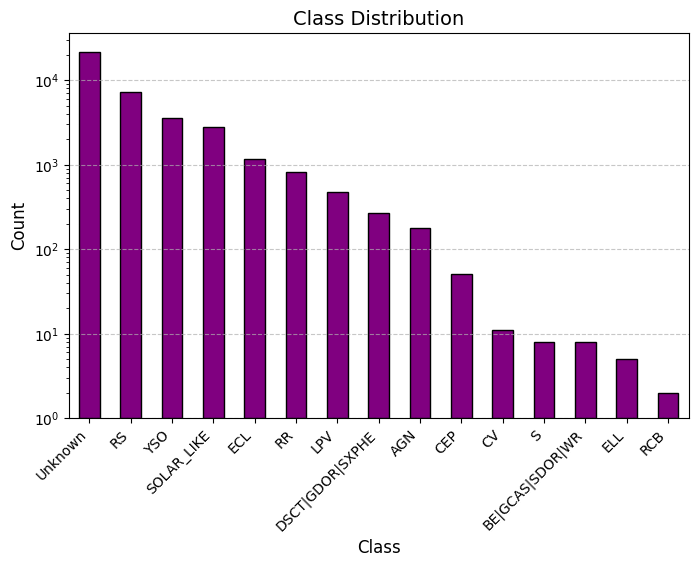

In [61]:
counts = subset['class_gaia'].value_counts()
counts
# Plot
plt.figure(figsize=(8,5))
counts.plot(kind="bar", color="purple", edgecolor="black", log=True)

plt.title("Class Distribution", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [62]:
counts

class_gaia
Unknown            21858
RS                  7269
YSO                 3570
SOLAR_LIKE          2760
ECL                 1171
RR                   811
LPV                  471
DSCT|GDOR|SXPHE      269
AGN                  176
CEP                   50
CV                    10
S                      7
BE|GCAS|SDOR|WR        7
ELL                    4
RCB                    1
Name: count, dtype: int64

In [ ]:
subset[subset['class_gaia']=='Unknown']['top_class'].value_counts()